In [1]:
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
%matplotlib inline



In [3]:
# load the provided data
train_features = pd.read_csv('dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('dengue_labels_train.csv',
                           index_col=[0,1,2])

In [4]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [5]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [6]:
sj_train_features[:-1]


week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   
...                         ...       ...       ...       ...       ...   
2008 12              2008-03-18  0.044900  0.024450  0.101629  0.088000   
     13              2008-03-25  0.077850 -0.039900  0.310471  0.296243   
     14              2008-04-01 -0.038000 -0.016833  0.119371  0.066386   
     15              2008-04-08 -0.155200 -0.052750  0.137757  0.141214   
     16              2008-04-15  0.001800       NaN  0.203900  0.209843   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   
...                               ...                    ...   
2008 12                          0.00             297.404286   
     13                         27.19             296.958571   
     14                          3.82             298.081429   
     15                         16.96             297.460000   
     16                          0.00             297.630000   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   
...                                ...                          ...   
2008 12                     297.435714                   292.205714   
     13                     296.957143                   292.095714   
     14                     298.228571                   293.235714   
     15                     297.564286                   292.732857   
     16                     297.778571                   292.274286   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   
...                                    ...  ...   
2008 12                              299.8  ...   
     13                              299.7  ...   
     14                              299.8  ...   
     15                              299.4  ...   
     16                              299.7  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   
...                                          ...   
2008 12                                     0.90   
     13                                     7.55   
     14                                     3.67   
     15                                    35.0

In [7]:
sj_train_features.columns

Index(['week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

Text(0.5, 0, 'Time')

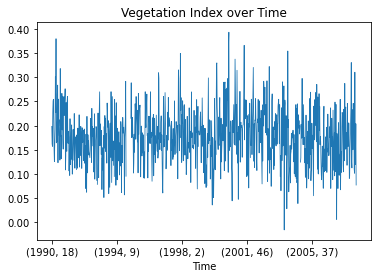

In [8]:
(sj_train_features
         .ndvi_se
         .plot
         .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [9]:
sj_train_features.describe(include='all')


,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,936,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,930.000000,...,930.000000,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
unique,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1999-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,301.398817,...,30.465419,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484
std,NaN,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,1.258927,...,35.628055,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811
min,NaN,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,297.800000,...,0.000000,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000
25%,NaN,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,298.300000,293.847857,300.400000,...,10.825000,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000
50%,NaN,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,299.378571,295.464286,301.500000,...,21.300000,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000
75%,NaN,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,300.228571,296.418929,302.400000,...,37.000000,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000


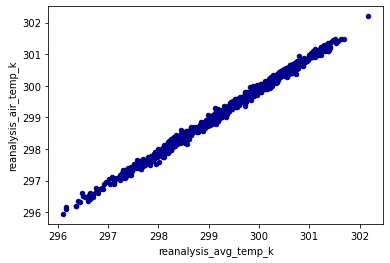

In [10]:
ax1 = sj_train_features.plot.scatter(x='reanalysis_avg_temp_k',
                      y='reanalysis_air_temp_k',
                      c='DarkBlue')

In [11]:

sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

In [12]:
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.0454396910277

Iquitos
mean:  7.565384615384615
var : 115.89552393656439


In [13]:

sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [14]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

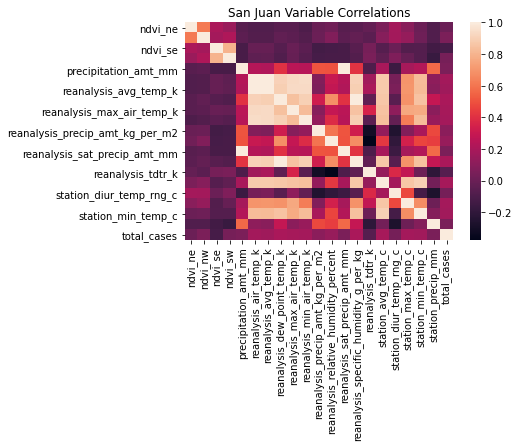

In [15]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

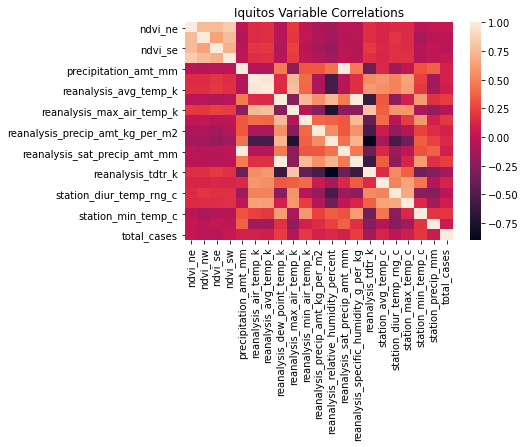

In [16]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

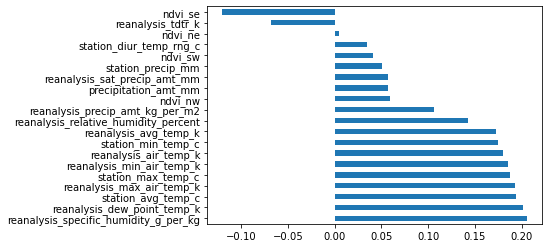

In [17]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

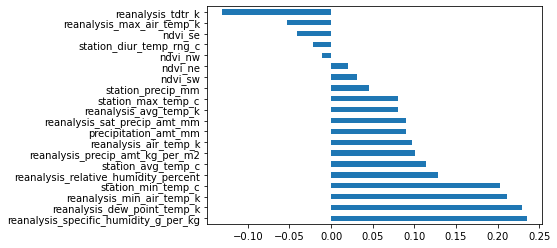

In [18]:

# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [19]:
sj_train_features.columns

Index(['week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

## First testing part

In [20]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    return sj, iq

In [46]:
sj_train, iq_train = preprocess_data('dengue_features_train.csv',
                                    labels_path="dengue_labels_train.csv")

In [47]:
sj_train.head()


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                     297.572857             297.742857   
     19                     298.211429             298.442857   
     20                     298.781429             298.878571   
     21                     298.987143             299.228571   
     22                     299.518571             299.664286   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
1990 18                           292.414286                      299.8   
     19                           293.951429                      300.9   
     20                           295.434286                      300.5   
     21                           295.310000                      301.4   
     22                           295.821429                      301.9   

                 reanalysis_min_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              295.9  ...   
     19                              296.4  ...   
     20                              297.3  ...   
     21                              297.0  ...   
     22                              297.5  ...   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  \
year weekofyear                                                              
1990 18                        29.4                20.0               16.0   
     19                        31.7                22.2                8.6   
     20                        32.2                22.8          

In [48]:
iq_train.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.263654,0.238813,0.250099,0.266698,64.353750,297.869464,299.131374,295.498723,307.066923,292.879038,...,88.666786,64.353750,17.102019,9.189835,27.506331,10.480468,33.966731,21.210385,61.581346,7.565385
std,0.081591,0.076733,0.077669,0.086309,35.180867,1.171486,1.332866,1.414360,2.389779,1.662983,...,7.580526,35.180867,1.443048,2.455961,0.908973,1.561678,1.355439,1.257734,62.968520,10.765478
min,0.061729,0.035860,0.029880,0.064183,0.000000,294.635714,294.892857,290.088571,300.000000,286.900000,...,57.787143,0.000000,12.111429,3.714286,21.400000,5.200000,30.100000,14.700000,0.000000,0.000000
25%,0.199879,0.179530,0.194607,0.203843,39.147500,297.092500,298.217857,294.596429,305.200000,292.000000,...,84.295000,39.147500,16.121429,7.371429,26.957500,9.400000,33.175000,20.600000,16.875000,1.000000
50%,0.263528,0.233243,0.249764,0.262221,60.470000,297.822857,299.121429,295.852143,307.000000,293.100000,...,90.942857,60.470000,17.428571,8.957143,27.587500,10.510000,34.000000,21.400000,44.050000,5.000000
75%,0.320021,0.293989,0.302550,0.324877,86.005000,298.649286,300.123214,296.557143,308.700000,294.200000,...,94.589643,86.005000,18.180357,11.003571,28.075000,11.627083,34.900000,22.000000,84.475000,9.000000
max,0.508357,0.454429,0.538314,0.546017,210.830000,301.637143,302.928571,298.450000,314.000000,296.000000,...,98.610000,210.830000,20.461429,16.028571,30.800000,15.800000,42.200000,24.200000,543.300000,116.000000


In [103]:
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

In [50]:
len(iq_train_subtest)

170

In [51]:
sj_subtrainX = sj_train_subtrain.drop(columns=['total_cases'])
sj_subtestX = sj_train_subtest.drop(columns=['total_cases'])
sj_subtrainY = sj_train_subtrain['total_cases']
sj_subtestY = sj_train_subtest['total_cases']

iq_subtrainX = iq_train_subtrain.drop(columns=['total_cases'])
iq_subtestX = iq_train_subtest.drop(columns=['total_cases'])
iq_subtrainY = iq_train_subtrain['total_cases']
iq_subtestY = iq_train_subtest['total_cases']

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

In [53]:
random_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
               'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
               'min_samples_split': [6, 10, 15],
               'min_samples_leaf': [1, 3, 6]}

In [54]:
for n_estimators in [100, 200]:
    for max_depth in [None, 10, 30, 50]:
        for min_samples_leaf in [1, 10, 20]:
            for max_features in [None, 0.8, 0.5, 0.3]:
                RFRegressionModel = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
                RFRegressionModel.fit(sj_subtrainX, sj_subtrainY)

                predictions = RFRegressionModel.predict(sj_subtestX)
                score = eval_measures.meanabs(predictions, sj_subtestY)
                print(score)
                print("n_estimators {}, max_depth {}, min_samples_leaf {}, max_features {}".format(n_estimators, max_depth, min_samples_leaf, max_features))


27.499425040355124
n_estimators 100, max_depth None, min_samples_leaf 1, max_features None
28.826149717514124
n_estimators 100, max_depth None, min_samples_leaf 1, max_features 0.8
28.839973769168683
n_estimators 100, max_depth None, min_samples_leaf 1, max_features 0.5
28.982329802259887
n_estimators 100, max_depth None, min_samples_leaf 1, max_features 0.3
24.60435634603812
n_estimators 100, max_depth None, min_samples_leaf 10, max_features None
25.699086382401827
n_estimators 100, max_depth None, min_samples_leaf 10, max_features 0.8
26.04839427134254
n_estimators 100, max_depth None, min_samples_leaf 10, max_features 0.5
26.682558951421747
n_estimators 100, max_depth None, min_samples_leaf 10, max_features 0.3
29.108261156816162
n_estimators 100, max_depth None, min_samples_leaf 20, max_features None
28.665759063412107
n_estimators 100, max_depth None, min_samples_leaf 20, max_features 0.8
27.90230327933468
n_estimators 100, max_depth None, min_samples_leaf 20, max_features 0.5
27.

29.309013836858497
n_estimators 200, max_depth 50, min_samples_leaf 20, max_features None
28.584369725892504
n_estimators 200, max_depth 50, min_samples_leaf 20, max_features 0.8
28.229003295404592
n_estimators 200, max_depth 50, min_samples_leaf 20, max_features 0.5
27.76808216596182
n_estimators 200, max_depth 50, min_samples_leaf 20, max_features 0.3


In [55]:
sj_best_model = RandomForestRegressor(n_estimators=200, max_features=0.5, max_depth=50, min_samples_leaf=10)

In [56]:
sj_best_model.fit(sj_subtrainX, sj_subtrainY)
sj_predictions = sj_best_model.predict(sj_train.drop(columns=['total_cases']))

In [57]:
sj_train.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                     297.572857             297.742857   
     19                     298.211429             298.442857   
     20                     298.781429             298.878571   
     21                     298.987143             299.228571   
     22                     299.518571             299.664286   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
1990 18                           292.414286                      299.8   
     19                           293.951429                      300.9   
     20                           295.434286                      300.5   
     21                           295.310000                      301.4   
     22                           295.821429                      301.9   

                 reanalysis_min_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              295.9  ...   
     19                              296.4  ...   
     20                              297.3  ...   
     21                              297.0  ...   
     22                              297.5  ...   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  \
year weekofyear                                                              
1990 18                        29.4                20.0               16.0   
     19                        31.7                22.2                8.6   
     20                        32.2                22.8          

In [58]:
for n_estimators in [100, 200]:
    for max_depth in [None, 10, 30, 50]:
        for min_samples_leaf in [1, 10, 20]:
            for max_features in [None, 0.8, 0.5, 0.3]:
                RFRegressionModel = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
                RFRegressionModel.fit(iq_subtrainX, iq_subtrainY)

                predictions = RFRegressionModel.predict(iq_subtestX)
                score = eval_measures.meanabs(predictions, iq_subtestY)
                print(score)
                print("n_estimators {}, max_depth {}, min_samples_leaf {}, max_features {}".format(n_estimators, max_depth, min_samples_leaf, max_features))


7.682666666666666
n_estimators 100, max_depth None, min_samples_leaf 1, max_features None
7.765750980392156
n_estimators 100, max_depth None, min_samples_leaf 1, max_features 0.8
7.5516
n_estimators 100, max_depth None, min_samples_leaf 1, max_features 0.5
7.4073529411764705
n_estimators 100, max_depth None, min_samples_leaf 1, max_features 0.3
7.4335525259934805
n_estimators 100, max_depth None, min_samples_leaf 10, max_features None
7.428717014574849
n_estimators 100, max_depth None, min_samples_leaf 10, max_features 0.8
7.243125861174286
n_estimators 100, max_depth None, min_samples_leaf 10, max_features 0.5
7.170159961580698
n_estimators 100, max_depth None, min_samples_leaf 10, max_features 0.3
7.2983604541226335
n_estimators 100, max_depth None, min_samples_leaf 20, max_features None
7.248395625516878
n_estimators 100, max_depth None, min_samples_leaf 20, max_features 0.8
7.180412048500158
n_estimators 100, max_depth None, min_samples_leaf 20, max_features 0.5
7.0032569219541685


7.263185389554353
n_estimators 200, max_depth 50, min_samples_leaf 20, max_features 0.8
7.152005632056044
n_estimators 200, max_depth 50, min_samples_leaf 20, max_features 0.5
6.999711130999822
n_estimators 200, max_depth 50, min_samples_leaf 20, max_features 0.3


In [59]:
iq_best_model = RandomForestRegressor(n_estimators=200, max_features=0.3, max_depth=50, min_samples_leaf=20)

In [71]:
iq_best_model.fit(iq_subtrainX, iq_subtrainY)
iq_predictions = iq_best_model.predict(iq_train.drop(columns=['total_cases']))

In [77]:
sj_train = sj_train.drop(columns='fitted')
iq_train = iq_train.drop(columns='fitted')

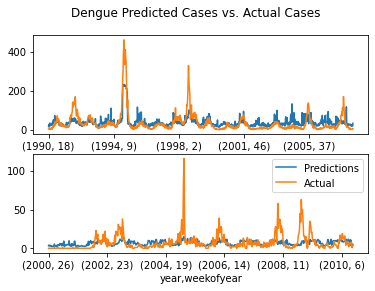

In [72]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_predictions
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_predictions
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

# XGBoost

In [106]:
from xgboost import XGBRegressor

In [107]:
xgbmodel = XGBRegressor()
xgbmodel.fit(sj_subtrainX, sj_subtrainY)

predictions = xgbmodel.predict(sj_subtestX)
score = eval_measures.meanabs(predictions, sj_subtestY)
print(score)

26.924123596336884


In [125]:
sj_subtestX

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                
2003 42          0.01610  0.037100  0.243400  0.267729                118.50   
     43         -0.04160  0.055300  0.169929  0.128171                 20.44   
     44          0.08920  0.000350  0.094650  0.088114                 96.70   
     45          0.08920  0.163500  0.137717  0.124800                 79.96   
     46          0.06925  0.055375  0.065486  0.074886                 97.28   
...                  ...       ...       ...       ...                   ...   
2008 13          0.07785 -0.039900  0.310471  0.296243                 27.19   
     14         -0.03800 -0.016833  0.119371  0.066386                  3.82   
     15         -0.15520 -0.052750  0.137757  0.141214                 16.96   
     16          0.00180 -0.052750  0.203900  0.209843                  0.00   
     17         -0.03700 -0.010367  0.077314  0.090586                  0.00   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
2003 42                     300.678571             300.828571   
     43                     301.090000             301.157143   
     44                     300.952857             301.114286   
     45                     300.162857             300.235714   
     46                     300.054286             300.050000   
...                                ...                    ...   
2008 13                     296.958571             296.957143   
     14                     298.081429             298.228571   
     15                     297.460000             297.564286   
     16                     297.630000             297.778571   
     17                     298.672857             298.692857   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
2003 42                           296.940000                      302.9   
     43                           296.790000                      302.9   
     44                           296.651429                      303.4   
     45                           296.000000                      302.7   
     46                           296.665714                      301.7   
...                                      ...                        ...   
2008 13                           292.095714                      299.7   
     14                           293.235714                      299.8   
     15                           292.732857                      299.4   
     16                           292.274286                      299.7   
     17                           294.280000                      300.9   

                 reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                                               
2003 42                              298.3                            97.70   
     43                              299.0                            10.70   
     44                              298.6                            17.08   
     45                              297.5                            35.90   
     46                              298.3                            92.10   
...                                    ...                              ...   
2008 13                              294.4                             7.55   
     14                              296.5                             3.67   
     15                              295.8                            35.00   
     16                              295.9                             4.82   
     17                              295.9                             2.17   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
2003 42     

In [108]:
for n_estimators in [50, 200, 400, 800]:
    for learning_rate in [0.001, 0.003, 0.01, 0.03]:
        for max_depth in [3, 8, 15]:
            for subsample in [0.8, 0.9, 1]:
                for colsample_bytree in [0.5, 0.7, 0.9]:
                    for gamma in [0, 1, 5]:
                        xgbmodel = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate ,n_jobs=-1, subsample=subsample, colsample_bytree=colsample_bytree, gamma=gamma)
                        xgbmodel.fit(sj_subtrainX, sj_subtrainY)
                        predictions = xgbmodel.predict(sj_subtestX)
                        score = eval_measures.meanabs(predictions, sj_subtestY)
                        print(score)
                        print("n_estimators= {}, learning_rate= {}, max_depth = {}, subsample = {}, colsample_bytree = {}, gamma = {}".format(n_estimators, learning_rate, max_depth, subsample, colsample_bytree, gamma))

20.791898251590084
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
20.791812767416744
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
20.791730742838425
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
20.786774431749926
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
20.786758338495837
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
20.786751707226543
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
20.74983051318233
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.9, gamma = 0
20.749805557778327
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.9, gamma = 1
2

20.777912161612914
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 5
20.774011868288962
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
20.774011868288962
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
20.774055774939264
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
20.77023581428043
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 0
20.770235821352166
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 1
20.770165944503525
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 5
20.7686177623474
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 1, colsample_bytree = 0.7, gamma = 0
20.

18.246778445728754
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
18.24601656501576
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
18.351375036320444
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
18.351350025605345
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
18.35160413940074
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
18.37724467152256
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.9, gamma = 0
18.37724467152256
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.9, gamma = 1
18.37779684541589
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.9, gamma =

15.89030890242528
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
15.890309381282936
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
15.889706218646744
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
15.264299829127426
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.5, gamma = 0
15.264017775907355
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.5, gamma = 1
15.261511804693836
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.5, gamma = 5
15.61957402855663
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 0
15.61972023571952
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 1
15.621353204977714
n_

19.148779440734344
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
19.14779608532534
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
19.61989884861445
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
19.61990695484614
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
19.619662810180145
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
20.038190546682326
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.8, colsample_bytree = 0.9, gamma = 0
20.033753884040703
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.8, colsample_bytree = 0.9, gamma = 1
19.97706905057875
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.8, colsample_bytree = 0.9, gamma = 5
19.234457678

17.610249825453355
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
17.610273609727116
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
17.61023705490565
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
17.374389859579377
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.5, gamma = 0
17.37437916408151
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.5, gamma = 1
17.37429605803247
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.5, gamma = 5
17.502465761314003
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.7, gamma = 0
17.502430612758054
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.7, gamma = 1
17.50

15.164092035616859
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
15.164066842046834
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
15.161426641173282
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
15.480520951545845
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
15.480595608889047
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
15.48033001463292
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
15.803814085863404
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.9, gamma = 0
15.802870156401294
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.9, gam

15.556641198820987
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 0
15.556812003507453
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 1
15.558953454938985
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 5
15.813041080862789
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
15.813254516003495
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
15.813299599340407
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
15.285086813619582
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 0
15.28479409419884
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.5,

21.632687617156463
n_estimators= 200, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 1
21.638885425309002
n_estimators= 200, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 5
20.896074347576853
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
20.892927129389875
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
20.894212872295057
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
21.39563221042439
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
21.396407600176538
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
21.44015345330966
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 5


25.418582564693388
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.5, gamma = 1
25.37034184649839
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.5, gamma = 5
26.322753712282342
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.7, gamma = 0
26.227547625363883
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.7, gamma = 1
26.243153467016704
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.7, gamma = 5
27.044820066225732
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
26.805494457988416
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
26.644114765070253
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
2

15.807776437977614
n_estimators= 400, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.7, gamma = 1
15.808333564612825
n_estimators= 400, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.7, gamma = 5
16.04619860750134
n_estimators= 400, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.9, gamma = 0
16.047514989214427
n_estimators= 400, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.9, gamma = 1
16.048564288575772
n_estimators= 400, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.9, gamma = 5
15.398152618084923
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
15.398150468276718
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
15.398392838946844
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
15.

18.5291553755938
n_estimators= 400, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.9, gamma = 1
18.533387220512
n_estimators= 400, learning_rate= 0.003, max_depth = 3, subsample = 0.8, colsample_bytree = 0.9, gamma = 5
17.798130395048755
n_estimators= 400, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.5, gamma = 0
17.796899694507406
n_estimators= 400, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.5, gamma = 1
17.801207619198298
n_estimators= 400, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.5, gamma = 5
18.165196653139795
n_estimators= 400, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.7, gamma = 0
18.164748058480733
n_estimators= 400, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.7, gamma = 1
18.167302450891267
n_estimators= 400, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.7, gamma =

17.903639328681816
n_estimators= 400, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 1
17.903106455075537
n_estimators= 400, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 5
18.149122155318825
n_estimators= 400, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.7, gamma = 0
18.14981286606546
n_estimators= 400, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.7, gamma = 1
18.1487466117083
n_estimators= 400, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.7, gamma = 5
18.338548945168316
n_estimators= 400, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.9, gamma = 0
18.337624555927214
n_estimators= 400, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.9, gamma = 1
18.334371247534026
n_estimators= 400, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.9, gamma = 5
24.

24.908112331972283
n_estimators= 400, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
24.995650016655357
n_estimators= 400, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
25.88317355058961
n_estimators= 400, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.9, gamma = 0
25.868041454735447
n_estimators= 400, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.9, gamma = 1
25.878954515618794
n_estimators= 400, learning_rate= 0.01, max_depth = 15, subsample = 0.8, colsample_bytree = 0.9, gamma = 5
24.337754136424955
n_estimators= 400, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.5, gamma = 0
24.364679340588843
n_estimators= 400, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.5, gamma = 1
24.360521858021364
n_estimators= 400, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.5, gam

27.505428079831397
n_estimators= 400, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
27.413542113061677
n_estimators= 400, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
26.228690288834652
n_estimators= 400, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.5, gamma = 0
26.53137012861543
n_estimators= 400, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.5, gamma = 1
26.429280466952566
n_estimators= 400, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.5, gamma = 5
26.58305676104659
n_estimators= 400, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 0
26.997194488169782
n_estimators= 400, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 1
26.64914831872714
n_estimators= 400, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 5
26.692115842285

15.928452083619975
n_estimators= 800, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
15.926507646754636
n_estimators= 800, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
16.186534255237902
n_estimators= 800, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
16.186578293978158
n_estimators= 800, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
16.186125957359703
n_estimators= 800, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
16.589251102027248
n_estimators= 800, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.9, gamma = 0
16.593253717584126
n_estimators= 800, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.9, gamma = 1
16.592374419761917
n_estimators= 800, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.9, ga

22.56069054441937
n_estimators= 800, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.7, gamma = 1
22.562474671056716
n_estimators= 800, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.7, gamma = 5
23.004492060612822
n_estimators= 800, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
23.002580970020617
n_estimators= 800, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
23.013595548726745
n_estimators= 800, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
22.14793245671159
n_estimators= 800, learning_rate= 0.003, max_depth = 3, subsample = 1, colsample_bytree = 0.5, gamma = 0
22.142947431338037
n_estimators= 800, learning_rate= 0.003, max_depth = 3, subsample = 1, colsample_bytree = 0.5, gamma = 1
22.14139233201237
n_estimators= 800, learning_rate= 0.003, max_depth = 3, subsample = 1, colsample_bytree = 0.5, gamma = 5
2

22.556214425523404
n_estimators= 800, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.9, gamma = 1
22.581155360755275
n_estimators= 800, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.9, gamma = 5
25.823685108605076
n_estimators= 800, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
25.79750141046815
n_estimators= 800, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
25.894408080537442
n_estimators= 800, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
26.60639950784586
n_estimators= 800, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
26.600730584839642
n_estimators= 800, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
26.663304813837602
n_estimators= 800, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
27

25.759629322310627
n_estimators= 800, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.5, gamma = 1
25.779349496809104
n_estimators= 800, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.5, gamma = 5
26.7195078558841
n_estimators= 800, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 0
26.632891347852805
n_estimators= 800, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 1
26.63220396688429
n_estimators= 800, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 5
27.230100744861666
n_estimators= 800, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
27.202222355341508
n_estimators= 800, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
27.151542215024012
n_estimators= 800, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma

27.25730898824789
n_estimators= 800, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 1
26.92638404490584
n_estimators= 800, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 5
27.09157512147548
n_estimators= 800, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 0
26.925505985647945
n_estimators= 800, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 1
26.716941710245813
n_estimators= 800, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 5
26.78059379529145
n_estimators= 800, learning_rate= 0.03, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
26.80085141780013
n_estimators= 800, learning_rate= 0.03, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
26.9423108727245
n_estimators= 800, learning_rate= 0.03, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
27.44928346650

In [109]:
sj_best_model = XGBRegressor(n_estimators=200, learning_rate=0.003, max_depth = 8, n_jobs=-1, subsample=0.8, colsample_bytree=0.7, gamma=5)

sj_best_model.fit(sj_subtrainX, sj_subtrainY)
sj_predictions = sj_best_model.predict(sj_train.drop(columns=['total_cases']))

In [110]:
xgbmodel.fit(iq_subtrainX, iq_subtrainY)

predictions = xgbmodel.predict(iq_subtestX)
score = eval_measures.meanabs(predictions, iq_subtestY)
print(score)

8.482056567949407


In [112]:
for n_estimators in [50, 200, 400, 800]:
    for learning_rate in [0.001, 0.003, 0.01, 0.03]:
        for max_depth in [3, 8, 15]:
            for subsample in [0.8, 0.9, 1]:
                for colsample_bytree in [0.5, 0.7, 0.9]:
                    for gamma in [0, 1, 5]:
                        xgbmodel = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate ,n_jobs=-1, subsample=subsample, colsample_bytree=colsample_bytree, gamma=gamma)
                        xgbmodel.fit(iq_subtrainX, iq_subtrainY)
                        predictions = xgbmodel.predict(iq_subtestX)
                        score = eval_measures.meanabs(predictions, iq_subtestY)
                        print(score)
                        print("n_estimators= {}, learning_rate= {}, max_depth = {}, subsample = {}, colsample_bytree = {}, gamma = {}".format(n_estimators, learning_rate, max_depth, subsample, colsample_bytree, gamma))

8.849670034997603
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
8.849670034997603
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
8.849670034997603
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
8.846977855878718
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
8.846977855878718
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
8.846977855878718
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
8.844878937917597
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.9, gamma = 0
8.844878937917597
n_estimators= 50, learning_rate= 0.001, max_depth = 3, subsample = 0.8, colsample_bytree = 0.9, gamma = 1
8.844878

8.891829004357843
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
8.891290071781944
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
8.889172925668603
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
8.903716648676816
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 0
8.90309712045333
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 1
8.900624151440228
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 5
8.892921636385076
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 1, colsample_bytree = 0.7, gamma = 0
8.891574033218271
n_estimators= 50, learning_rate= 0.001, max_depth = 15, subsample = 1, colsample_bytree = 0.7, gamma = 1
8.888770910

8.475073988297407
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
8.473578329647289
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
8.465984451770783
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
8.462220172321095
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.9, gamma = 0
8.461083873229867
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.9, gamma = 1
8.454371307877933
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.8, colsample_bytree = 0.9, gamma = 5
8.512874818549436
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.9, colsample_bytree = 0.5, gamma = 0
8.509860967537936
n_estimators= 50, learning_rate= 0.003, max_depth = 15, subsample = 0.9, colsample_bytree = 0.5, gamma = 1


7.6444897237946
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.5, gamma = 1
7.638713026747984
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.5, gamma = 5
7.691636048345005
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 0
7.687493278699763
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 1
7.6847486958784215
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.7, gamma = 5
7.805040776729584
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 0
7.807061166623059
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 1
7.8124630012932945
n_estimators= 50, learning_rate= 0.01, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 5
7.662370117271648
n_estimators= 

7.188429976912106
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.5, gamma = 1
7.187195995274712
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.5, gamma = 5
7.236323167997248
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.7, gamma = 0
7.294792812361437
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.7, gamma = 1
7.31429368538015
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.7, gamma = 5
7.4264421252643364
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
7.388597082390505
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
7.410640812621397
n_estimators= 50, learning_rate= 0.03, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
7.33129283400142

8.197558656159568
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.9, gamma = 0
8.197558656159568
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.9, gamma = 1
8.197558656159568
n_estimators= 200, learning_rate= 0.001, max_depth = 3, subsample = 1, colsample_bytree = 0.9, gamma = 5
8.311961562142653
n_estimators= 200, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
8.310273700601915
n_estimators= 200, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
8.306250778717153
n_estimators= 200, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
8.303709918961806
n_estimators= 200, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
8.301641477907404
n_estimators= 200, learning_rate= 0.001, max_depth = 8, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
8.2987

7.327747416496277
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.7, gamma = 1
7.327747416496277
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.7, gamma = 5
7.340572444130393
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
7.340572444130393
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
7.340572444130393
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
7.316930319982417
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 1, colsample_bytree = 0.5, gamma = 0
7.316930319982417
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 1, colsample_bytree = 0.5, gamma = 1
7.316930319982417
n_estimators= 200, learning_rate= 0.003, max_depth = 3, subsample = 1, colsample_bytree = 0.5, gamma = 5
7.3527

7.795394669736133
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.9, gamma = 1
7.800286409258843
n_estimators= 200, learning_rate= 0.003, max_depth = 15, subsample = 1, colsample_bytree = 0.9, gamma = 5
7.197718423955581
n_estimators= 200, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
7.197742232154398
n_estimators= 200, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
7.197556827348821
n_estimators= 200, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
7.174574397591984
n_estimators= 200, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
7.174574397591984
n_estimators= 200, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
7.174355537049911
n_estimators= 200, learning_rate= 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
7.182205

7.2555463096674755
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.5, gamma = 5
7.436729148556204
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 0
7.427655282441307
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 1
7.416196947939255
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.7, gamma = 5
7.6438227253801685
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
7.634046959175783
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
7.597552067742628
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 0.9, colsample_bytree = 0.9, gamma = 5
7.383937695447137
n_estimators= 200, learning_rate= 0.01, max_depth = 15, subsample = 1, colsample_bytree = 0.5, gamma = 0


9.077374423952664
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 1
8.690390992865844
n_estimators= 200, learning_rate= 0.03, max_depth = 8, subsample = 1, colsample_bytree = 0.9, gamma = 5
7.888797915683073
n_estimators= 200, learning_rate= 0.03, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 0
7.925458976100473
n_estimators= 200, learning_rate= 0.03, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 1
7.764625695172478
n_estimators= 200, learning_rate= 0.03, max_depth = 15, subsample = 0.8, colsample_bytree = 0.5, gamma = 5
7.879277754531187
n_estimators= 200, learning_rate= 0.03, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 0
7.93436005045386
n_estimators= 200, learning_rate= 0.03, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 1
7.948159297073588
n_estimators= 200, learning_rate= 0.03, max_depth = 15, subsample = 0.8, colsample_bytree = 0.7, gamma = 5
8.11653

7.792681076596765
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.9, colsample_bytree = 0.5, gamma = 1
7.790795218593934
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.9, colsample_bytree = 0.5, gamma = 5
7.805041946032468
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.9, colsample_bytree = 0.7, gamma = 0
7.803510333860622
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.9, colsample_bytree = 0.7, gamma = 1
7.798915339217467
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.9, colsample_bytree = 0.7, gamma = 5
7.815028379945194
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 0
7.814577618066003
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 1
7.8106082513051875
n_estimators= 400, learning_rate= 0.001, max_depth = 8, subsample = 0.9, colsample_bytree = 0.9, gamma = 5

KeyboardInterrupt: 

In [113]:
iq_best_model = XGBRegressor(n_estimators=50, learning_rate=0.03, max_depth = 3, n_jobs=-1, subsample=0.9, colsample_bytree=0.5, gamma=1)

iq_best_model.fit(iq_subtrainX, iq_subtrainY)
iq_predictions = iq_best_model.predict(iq_train.drop(columns=['total_cases']))

In [120]:
sj_train = sj_train.drop(columns='fitted')
iq_train = iq_train.drop(columns='fitted')

KeyError: "['fitted'] not found in axis"

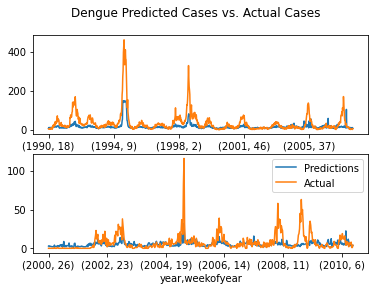

In [115]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_predictions
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_predictions
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()


# put together for submission

In [122]:
sj_best_model = XGBRegressor(n_estimators=200, learning_rate=0.003, max_depth = 8, n_jobs=-1, subsample=0.8, colsample_bytree=0.7, gamma=5)

sj_best_model.fit(sj_train.drop(columns="total_cases"), sj_train["total_cases"])

iq_best_model = XGBRegressor(n_estimators=50, learning_rate=0.03, max_depth = 3, n_jobs=-1, subsample=0.9, colsample_bytree=0.5, gamma=1)

iq_best_model.fit(iq_train.drop(columns="total_cases"), iq_train["total_cases"])

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.03, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method=None, validate_parameters=False, verbosity=None)

In [123]:
sj_test, iq_test = preprocess_data('dengue_features_test.csv')

sj_predictions = sj_best_model.predict(sj_test).astype(int)
iq_predictions = iq_best_model.predict(iq_test).astype(int)

submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("xgbmodel1_3.csv")

# dit is onzin uit die benchmark, doet het wel beter

In [104]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  1e-08
best score =  22.080882352941178
best alpha =  1e-08
best score =  6.466666666666667


In [105]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf
                 
def get_best_model(train, test):
    model_formula = 'total_cases ~ 1 + ' \
                    'ndvi_ne + ' \
                    'ndvi_nw + ' \
                    'ndvi_se + ' \
                    'ndvi_sw + ' \
                    'precipitation_amt_mm + ' \
                    'reanalysis_air_temp_k + ' \
                    'reanalysis_avg_temp_k + ' \
                    'reanalysis_dew_point_temp_k + ' \
                    'reanalysis_max_air_temp_k + ' \
                    'reanalysis_min_air_temp_k + ' \
                    'reanalysis_precip_amt_kg_per_m2 + ' \
                    'reanalysis_relative_humidity_percent + ' \
                    'reanalysis_sat_precip_amt_mm + ' \
                    'reanalysis_specific_humidity_g_per_kg + ' \
                    'reanalysis_tdtr_k + ' \
                    'station_avg_temp_c + ' \
                    'station_diur_temp_rng_c + ' \
                    'station_max_temp_c + ' \
                    'station_min_temp_c + ' \
                    'station_precip_mm'
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  0.0001
best score =  23.058823529411764
best alpha =  1e-08
best score =  6.833333333333333


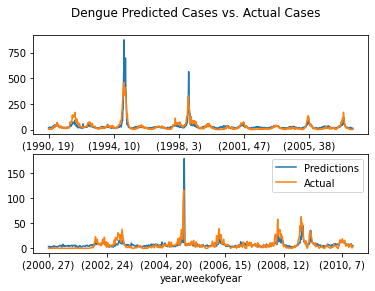

In [26]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_best_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_best_model.fittedvalues
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()